##### QGraphicsView 顯示圖片
QGraphicsView 是 PyQt5 裡負責顯示圖形的元件，搭配 QGraphicsScene 和 QtGui.QPixmap() 就可以顯示圖片，\
這篇教學會介紹如何在 PyQt5 視窗裡加入 QGraphicsView 元件並顯示圖片。

##### QGraphicsView 顯示圖片 
建立 PyQt5 視窗物件後，透過 QtWidgets.QGraphicsView(widget) 方法，就能在指定的元件中建立顯示圖形元件，\
QGraphicsView 建立後，需再使用 QtWidgets.QGraphicsScene() 建立場景元件，再透過 QtGui.QPixmap() 於場景中加入圖片，\
最後將場景加入 QGraphicsView 就可以顯示圖片，如果場景大小超過顯示區域，會自動出現捲軸。

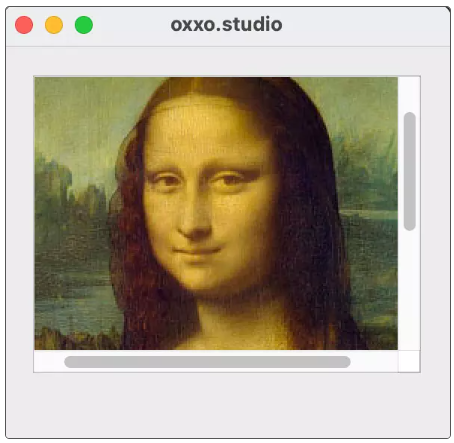

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('Patrick Star.studio')
Form.resize(1200, 1200)

grview = QtWidgets.QGraphicsView(Form)  # 加入 QGraphicsView
grview.setGeometry(20, 20, 1000, 1000)    # 設定 QGraphicsView 位置與大小
scene = QtWidgets.QGraphicsScene()      # 加入 QGraphicsScene
scene.setSceneRect(0, 0, 1000, 1000)      # 設定 QGraphicsScene 位置與大小
img = QtGui.QPixmap('Data\image\Patrick Star1.jpg')         # 加入圖片
scene.addPixmap(img)                    # 將圖片加入 scene
grview.setScene(scene)                  # 設定 QGraphicsView 的場景為 scene

Form.show()
sys.exit(app.exec_())

##### 改變圖片尺寸 
使用 QtGui.QPixmap() 建立圖片後，就能透過 scaled(w, h) 方法調整圖片大小，下方的程式碼執行後，會顯示縮小後的圖片。

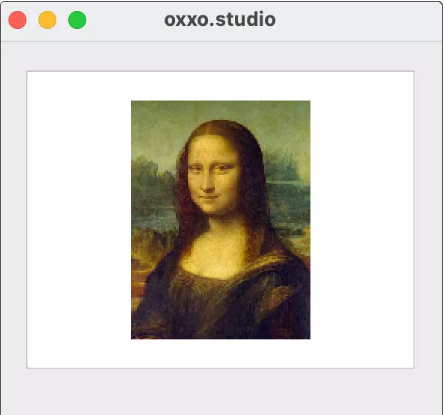

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('Patrick Star.studio')
Form.resize(1000, 1000)                    # 視窗大小

grview = QtWidgets.QGraphicsView(Form)
grview.setGeometry(20, 20, 720, 720)     # QGraphicsView 位置 (20, 20) 和大小 720x720
scene = QtWidgets.QGraphicsScene()
scene.setSceneRect(0, 0, 480, 480)       # QGraphicsScene 相對位置 (20, 20) 和大小 480x480
img = QtGui.QPixmap('Data\image\Patrick Star1.jpg')
img = img.scaled(480,480)                # 調整圖片大小為 480x480
scene.addPixmap(img)
grview.setScene(scene)

Form.show()
sys.exit(app.exec_())

##### 設定圖片位置 
因為使用 setSceneRect 時定位是以「中心點」為主，如果要改成熟悉的「左上角」定位，可透過簡單的數學公式換算，\
下方的程式碼執行後，會將定位點改成左上角，修改 x 和 y 的數值，就可以控制圖片左上角的座標。

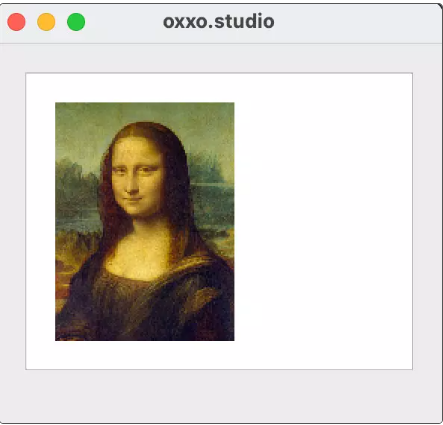

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('Patrick Star.studio')
Form.resize(1000, 1000)

grview = QtWidgets.QGraphicsView(Form)
gw = 720
gh = 720
grview.setGeometry(20, 20, gw, gh)    # QGraphicsView 的長寬改成變數
scene = QtWidgets.QGraphicsScene()
img = QtGui.QPixmap('Data\image\Patrick Star1.jpg')
img_w = 480                           # 顯示圖片的寬度
img_h = 480                           # 顯示圖片的高度
img = img.scaled(img_w, img_h)
x = 20                                # 左上角 x 座標
y = 20                                # 左上角 y 座標
dx = int((gw - img_w) / 2) - x        # 修正公式
dy = int((gh - img_h) / 2) - y
scene.setSceneRect(dx, dy, img_w, img_h)
scene.addPixmap(img)
grview.setScene(scene)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('Patrick Star.studio')
        self.resize(1000, 1000)
        self.ui()

    def ui(self):
        grview = QtWidgets.QGraphicsView(self)
        gw = 720
        gh = 720
        grview.setGeometry(20, 20, gw, gh)    # QGraphicsView 的長寬改成變數
        scene = QtWidgets.QGraphicsScene()
        img = QtGui.QPixmap('Data\image\Patrick Star1.jpg')
        img_w = 480                           # 顯示圖片的寬度
        img_h = 480                           # 顯示圖片的高度
        img = img.scaled(img_w, img_h)
        x = 20                                # 左上角 x 座標
        y = 20                                # 左上角 y 座標
        dx = int((gw - img_w) / 2) - x        # 修正公式
        dy = int((gh - img_h) / 2) - y
        scene.setSceneRect(dx, dy, img_w, img_h)
        scene.addPixmap(img)
        grview.setScene(scene)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
sys.exit(app.exec_())

顯示多張圖片 
如果要加入多張圖片，就要使用 QItem 的做法，下方的程式碼執行後，會在場景裡放入兩個圖片尺寸不同的 QItem。

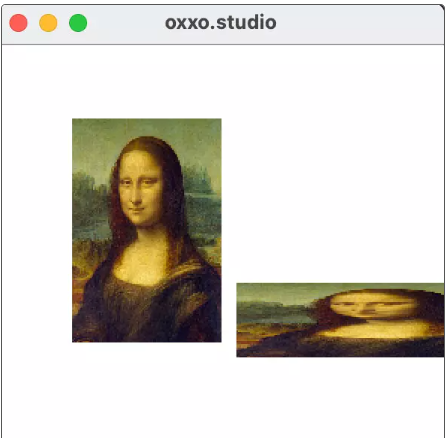

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import QPixmap
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("Patrick Star.studio")
MainWindow.resize(1200, 1200)

grview = QtWidgets.QGraphicsView(MainWindow)  # 加入 QGraphicsView
grview.setGeometry(0, 0, 1000, 1000)          # 設定 QGraphicsView 位置與大小
scene = QtWidgets.QGraphicsScene()            # 加入 QGraphicsScene
scene.setSceneRect(0, 0, 1000, 1000)          # 設定 QGraphicsScene 位置與大小

# 建立第一張圖片
img = QPixmap('Data\image\Patrick Star1.jpg')  # 建立圖片
img1 = img.scaled(480, 360)                    # 縮放第一張圖片
qitem1 = QtWidgets.QGraphicsPixmapItem(img1)   # 創建 QGraphicsPixmapItem，內容是 img1
qitem1.setPos(0, 0)                            # 設定第一張圖片的位置

# 建立第二張圖片
img2 = img.scaled(360, 480)                    # 縮放第二張圖片
qitem2 = QtWidgets.QGraphicsPixmapItem(img2)   # 創建 QGraphicsPixmapItem，內容是 img2
qitem2.setPos(500, 300)                        # 設定第二張圖片的位置

scene.addItem(qitem1)                          # 圖片加入場景
scene.addItem(qitem2)                          # 圖片加入場景
grview.setScene(scene)                         # 將 scene 設為 QGraphicsView 的場景

MainWindow.show()
sys.exit(app.exec_())
